##  install necessary packages ( install first time only )

In [3]:
# pip install numpy pandas sklearn xgboost

# This Python 3 environment comes with many helpful analytics libraries installed  (Library required to analysis)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from os import system
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Data import

In [5]:
data = pd.read_csv('parkinsons.data')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [9]:
# There are 147 people affected with PD
data.status.value_counts()

1    147
0     48
Name: status, dtype: int64

## decision tree j48

In [10]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [11]:
#split dataset in features and target variable
feature_cols = ['MDVP:Fo(Hz)' , 'Jitter:DDP','Shimmer:DDA','DFA','PPE']


In [12]:
X = data[feature_cols] # Features

y = data.status # Target variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.864406779661017


In [16]:
# pip install graphviz

# pip install pydotplus

In [17]:
# conda install graphviz


In [18]:
# conda install python-graphviz

In [19]:
from sklearn.metrics import pairwise_distances

feature_cols = ['MDVP:Fo(Hz)' , 'Jitter:DDP','Shimmer:DDA','DFA','PPE']


A = np.array(data[feature_cols])

dist_out = 1-pairwise_distances(A, metric="cosine")
dist_out

array([[1.        , 0.99999977, 0.99999983, ..., 0.99999401, 0.99999208,
        0.99999169],
       [0.99999977, 1.        , 0.99999991, ..., 0.99999297, 0.999991  ,
        0.99999065],
       [0.99999983, 0.99999991, 1.        , ..., 0.99999217, 0.99999003,
        0.99998962],
       ...,
       [0.99999401, 0.99999297, 0.99999217, ..., 1.        , 0.99999986,
        0.99999978],
       [0.99999208, 0.999991  , 0.99999003, ..., 0.99999986, 1.        ,
        0.99999999],
       [0.99999169, 0.99999065, 0.99998962, ..., 0.99999978, 0.99999999,
        1.        ]])

### z-score

In [20]:

import scipy.stats as stats

stats.zscore(data[feature_cols], axis=1)



array([[ 1.99996475, -0.50590242, -0.50476708, -0.48910636, -0.50018888],
       [ 1.99996674, -0.50634216, -0.50470202, -0.4898449 , -0.49907766],
       [ 1.99996272, -0.5063907 , -0.50496486, -0.48901168, -0.49959547],
       [ 1.9999632 , -0.50660185, -0.50504068, -0.48932321, -0.49899745],
       [ 1.99996294, -0.50690408, -0.5050662 , -0.48953185, -0.49846082],
       [ 1.99996431, -0.50628619, -0.50512245, -0.4894198 , -0.49913586],
       [ 1.99996726, -0.5051226 , -0.50473286, -0.48930305, -0.50080874],
       [ 1.99995843, -0.50546929, -0.50498935, -0.48775253, -0.50174725],
       [ 1.99994794, -0.50660509, -0.50599286, -0.48657839, -0.50077161],
       [ 1.99994449, -0.50716719, -0.50623844, -0.48631767, -0.50022119],
       [ 1.99993846, -0.50733236, -0.50663007, -0.4855164 , -0.50045964],
       [ 1.99994152, -0.50739213, -0.50645682, -0.48599882, -0.50009375],
       [ 1.99998164, -0.50362673, -0.50333179, -0.49186415, -0.50115897],
       [ 1.99998157, -0.5039207 , -0.5

## Zscore by it's individual column



In [21]:
data[feature_cols].apply(stats.zscore)

,MDVP:Fo(Hz),Jitter:DDP,Shimmer:DDA,DFA,PPE
0,-0.829300,0.131755,0.607532,1.760814,0.868886
1,-0.770972,0.452684,1.548254,1.837562,1.803605
2,-0.909476,0.721813,1.175323,1.942048,1.402661
3,-0.909622,0.577677,1.340229,1.832380,1.806954
4,-0.925657,1.096793,1.899461,1.909364,2.267082
...,...,...,...,...,...
190,0.483467,-0.227459,0.759930,-1.090704,-0.817703
191,1.339202,0.002258,0.037108,-0.631503,-0.418929
192,0.495578,0.992069,-0.294679,-1.130853,-0.832410
193,1.078761,0.131755,-0.297970,-1.343323,-0.926105


### Correlation comparision with  map

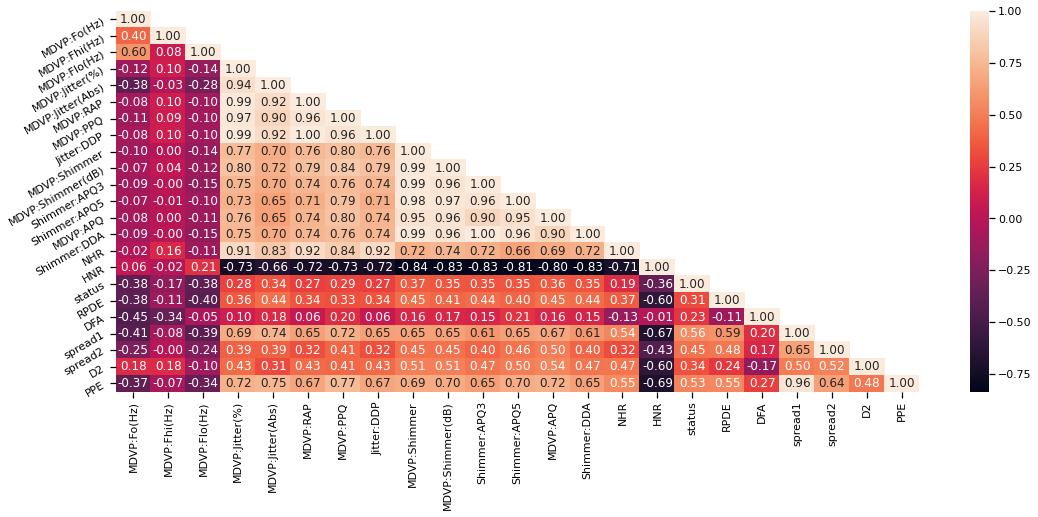

In [22]:
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 3.5})
plt.figure(figsize=(18,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [23]:
### corelation mattrix for 'MDVP:Fo(Hz)' , 'Jitter:DDP','Shimmer:DDA','DFA','PPE'

In [24]:

corr_matrix =  np.array(corr[feature_cols])
corr_matrix

array([[ 1.        , -0.07621269, -0.09473157, -0.44601329, -0.37235638],
       [ 0.40098468,  0.09714987, -0.00373289, -0.34309672, -0.069543  ],
       [ 0.59654552, -0.10048768, -0.15073674, -0.05040631, -0.34007134],
       [-0.11800263,  0.99027622,  0.74663517,  0.09857244,  0.72154293],
       [-0.38202665,  0.92291303,  0.69716971,  0.17503599,  0.74816165],
       [-0.07619381,  0.9999996 ,  0.74491923,  0.06408302,  0.67099905],
       [-0.11216543,  0.95731916,  0.76359216,  0.19630142,  0.76964729],
       [-0.07621269,  1.        ,  0.74490062,  0.0640264 ,  0.67100525],
       [-0.09837375,  0.7595547 ,  0.98762565,  0.15995362,  0.69377072],
       [-0.07374246,  0.7906206 ,  0.9632017 ,  0.16515658,  0.69505813],
       [-0.09471706,  0.74489376,  0.99999996,  0.15112446,  0.64537669],
       [-0.07068178,  0.70990709,  0.96007159,  0.2138731 ,  0.70245566],
       [-0.07777382,  0.73743867,  0.89664677,  0.15727578,  0.72169395],
       [-0.09473157,  0.74490062,  1. 

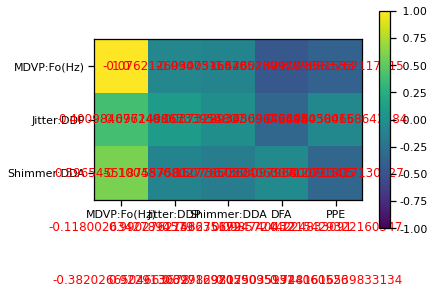

In [25]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('MDVP:Fo(Hz)' , 'Jitter:DDP','Shimmer:DDA','DFA','PPE'))
ax.yaxis.set(ticks=(0, 1, 2,3,4), ticklabels=('MDVP:Fo(Hz)' , 'Jitter:DDP','Shimmer:DDA','DFA','PPE'))
ax.set_ylim(2.5, -0.5)
for i in range(5):
    for j in range(5):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

### Decision Tree
Decision trees can be used to predict both continuous and discrete values i.e. they work well for both regression and classification tasks.

In [26]:
from sklearn import metrics

In [27]:
X = data.drop("status",axis=1)
Y = data["status"]



In [28]:
X = data.drop("name",axis=1)


In [29]:
# Splitting Data into 70% Training data and 30% Testing Data:
X_train, X_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=42)

In [30]:
# Applying decision tree model
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=100,min_samples_leaf=1)

In [31]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=100)

In [32]:
dt_model.score(X_test , y_test) 

1.0

In [33]:
confusion_matrix(y_test,y_pred)

array([[ 3, 12],
       [14, 30]], dtype=int64)

In [34]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
             random_state=100, splitter='best')

DecisionTreeClassifier(criterion='entropy', max_depth=6,
                       min_impurity_split=1e-07, min_samples_leaf=5,
                       random_state=100)

In [35]:
dt_model.score(X_test , y_test) 

1.0

In [36]:
from IPython.display import Image
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']
pd_tree_regularized = open('pd_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= pd_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

pd_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                  Imp
MDVP:Fo(Hz)       0.0
MDVP:Fhi(Hz)      0.0
MDVP:Flo(Hz)      0.0
MDVP:Jitter(%)    0.0
MDVP:Jitter(Abs)  0.0
MDVP:RAP          0.0
MDVP:PPQ          0.0
Jitter:DDP        0.0
MDVP:Shimmer      0.0
MDVP:Shimmer(dB)  0.0
Shimmer:APQ3      0.0
Shimmer:APQ5      0.0
MDVP:APQ          0.0
Shimmer:DDA       0.0
NHR               0.0
HNR               0.0
status            1.0
RPDE              0.0
DFA               0.0
spread1           0.0
spread2           0.0
D2                0.0
PPE               0.0


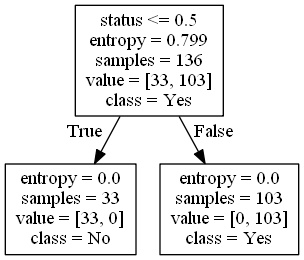

In [37]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
system("dot -Tpng pd_tree_regularized.dot -o pd_tree_regularized.png")
Image("pd_tree_regularized.png")

### k-nearest

In [38]:
k_model = KNeighborsClassifier(n_neighbors=5)
k_model.fit(X_train, y_train)
k_model.score(X_test,y_test)

0.8305084745762712

In [39]:
y_pred = k_model.predict(X_test)

In [40]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in KNN: {}'.format(count_misclassified))

Misclassified samples in KNN: 10


### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)
y_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

1.0

In [42]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in Random Forest: {}'.format(count_misclassified))

Misclassified samples in Random Forest: 0


No handles with labels found to put in legend.


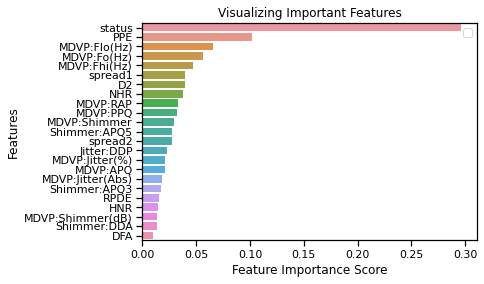

In [43]:
feature_imp = pd.Series(rfcl.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [44]:
data("Jitter:DDP")

rules <- apriori(
  Groceries, 
  parameter = list(support=0.001, confidence=0.6, target="rules")
)
plot(rules)

TypeError: 'DataFrame' object is not callable

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(16,8)) 
sns.distplot(data['MDVP:Flo(Hz)'],ax=ax[0]) 
sns.distplot(data['MDVP:Fo(Hz)'],ax=ax[1]) 
sns.distplot(data['MDVP:Fhi(Hz)'],ax=ax[2])

In [ ]:
fig, ax = plt.subplots(2,3,figsize=(16,8)) 
sns.distplot(data['MDVP:Shimmer'],ax=ax[0,0]) 
sns.distplot(data['MDVP:Shimmer(dB)'],ax=ax[0,1]) 
sns.distplot(data['Shimmer:APQ3'],ax=ax[0,2]) 
sns.distplot(data['Shimmer:APQ5'],ax=ax[1,0]) 
sns.distplot(data['MDVP:APQ'],ax=ax[1,1]) 
sns.distplot(data['Shimmer:DDA'],ax=ax[1,2])

In [ ]:
k_model = KNeighborsClassifier(n_neighbors=5)
k_model.fit(X_train, y_train)
k_model.score(X_test,y_test)

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

from sklearn.decomposition import FastICA
from sklearn.metrics import accuracy_score, log_loss
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('01')
    plt.xlabel('01')

In [ ]:
def plot_roc_curve(y_test, y_pred):
    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(8, 6))

    # method I: plt
    plt.title('Receiver Operating Characteristic', fontsize=14)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right', fontsize=11)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.005, 1])
    plt.ylim([0, 1.005])
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.grid(color='r', linestyle='--', linewidth=0.2)
    plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss
def my_GaussianNB(X_train, y_train, X_test, y_test, X, y):
    clf = GaussianNB()

    # fitting the classifier
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    print(" Train Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100))

    print("Test Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100))

    print(" Binary Cross Entropy - GaussianNB Model :=> {:.2f}".format(log_loss(y_test, y_pred)))

    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

    print(" Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100))


    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_GaussianNB(X_train, y_train, X_test, y_test, X, y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def my_KNN(X_train, y_train, X_test, y_test, X, y):
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - KNN Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    acc = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_KNN(X_train, y_train, X_test, y_test, X, y)

In [ ]:
def my_MLP(X_train, y_train, X_test, y_test, X, y):
    hidden_layer_size=300
    max_iteration=30000
    activation_function='relu'
    optimizer='adam'
    early_stopping = True
    ###################################
    mlp_adam = MLPClassifier(hidden_layer_sizes=(hidden_layer_size, 30), max_iter=max_iteration, 
                            activation=activation_function, solver=optimizer, 
                            learning_rate='adaptive', early_stopping=early_stopping)
    mlp_adam.fit(X_train, y_train)

    y_pred = mlp_adam.predict(X_test)


    print(classification_report(y_test, y_pred))


    y_pred_train = mlp_adam.predict(X_train)

    print("|| Train Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                                activation_function, 
                                                                                max_iteration,
                                                                                early_stopping,
                                                                                hidden_layer_size,
                                                                                accuracy_score(y_train, y_pred_train)*100
                                                                                )
    , "||")

    print("|| Test Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                                activation_function, 
                                                                                max_iteration,
                                                                                early_stopping,
                                                                                hidden_layer_size,
                                                                                accuracy_score(y_test, y_pred)*100
                                                                                )
    , "||")

    print("|| Binary Cross Entropy - MLP Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")


    # acc = cross_val_score(mlp_adam, X, y, cv=5, scoring='accuracy')
    # print("--------------------------------------------------------")
    # print("||====================================================||")
    # print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    # print("||====================================================||")
    # print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    # method I: plt
    plot_roc_curve(y_test, y_pred)

my_MLP(X_train, y_train, X_test, y_test, X, y)